In [9]:
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

In [10]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from nnights.experiment import Experiment
from nnights.utils import load_flights

In [11]:
# experiment configs
config = {
    'enrich': [
        'add_is_holiday',
        'add_distance_to_next_holiday',
        'add_distance_to_previous_holiday',
        'add_distance_to_holidays',
        'add_path_distance',
        'add_path_embedding',
        'add_day_of_year', 
    ],
    'model': {
        'model_instance': RandomForestRegressor,
        'train_params': {
            'use_cv': True,
            'scale': {'li_features': []},
        }
    },
    'x_columns': ['avg_weeks', 'std_weeks'],
}

config_grid = {
    'model_instance': RandomForestRegressor,
    'grid_config': {
        'param_grid': {'max_depth': np.arange(7, 15)},
        'cv': 10,
        'n_jobs': 5
    }
}

In [12]:
# load data
flights_train = load_flights(dtype='train')
flights_test = load_flights(dtype='test')

-- Enrich start ------------- 
add_is_holiday  ...
add_distance_to_next_holiday  ...
add_distance_to_previous_holiday  ...
add_distance_to_holidays  ...
add_path_distance  ...
add_path_embedding  ...
add_day_of_year  ...
-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks', 'is_holiday', 'distance_to_next_holiday', 'distance_to_previous_holiday', "distance_to_New Year's Day", 'distance_to_Birthday of Martin Luther King, Jr.', "distance_to_Washington's Birthday", 'distance_to_Memorial Day', 'distance_to_Juneteenth National Independence Day', 'distance_to_Independence Day', 'distance_to_Labor Day', 'distance_to_Columbus Day', 'distance_to_Veterans Day', 'distance_to_Thanksgiving Day', 'distance_to_Christmas Day', 'path_distance', 'from_in_degree', 'from_out_degree', 'to_in_degree', 'to_out_degree', 'day_of_year']
> fit model ...
model : RandomForestRegressor()
> cv results : 


> score model ...
RMSE on train : 0.2631698789909503
RMSE on test : 0.7043525004478544
--Feat imporance  ...
 


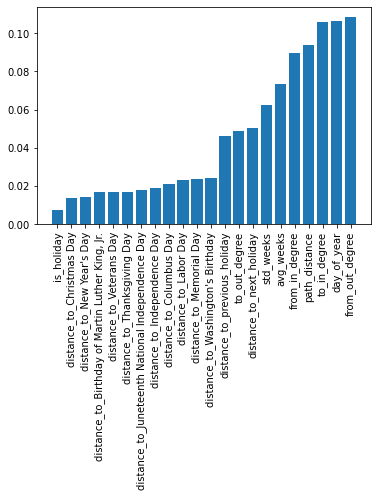

In [13]:
# init experiment
exp = Experiment(
    name="random-forest", 
    data=flights_train
)

# run experiment
exp.run(config)

In [14]:
exp.meta["cache"]['model']

RandomForestRegressor()

In [15]:
score, best_params = exp.grid_search(config=config_grid)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [16]:
best_params

{'max_depth': 10}

-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks', 'is_holiday', 'distance_to_next_holiday', 'distance_to_previous_holiday', "distance_to_New Year's Day", 'distance_to_Birthday of Martin Luther King, Jr.', "distance_to_Washington's Birthday", 'distance_to_Memorial Day', 'distance_to_Juneteenth National Independence Day', 'distance_to_Independence Day', 'distance_to_Labor Day', 'distance_to_Columbus Day', 'distance_to_Veterans Day', 'distance_to_Thanksgiving Day', 'distance_to_Christmas Day', 'path_distance', 'from_in_degree', 'from_out_degree', 'to_in_degree', 'to_out_degree', 'day_of_year']
> fit model ...
model : RandomForestRegressor()
> cv results : 


> score model ...
RMSE on train : 0.26377780099518083
RMSE on test : 0.7049391521448838
--Feat imporance  ...
 


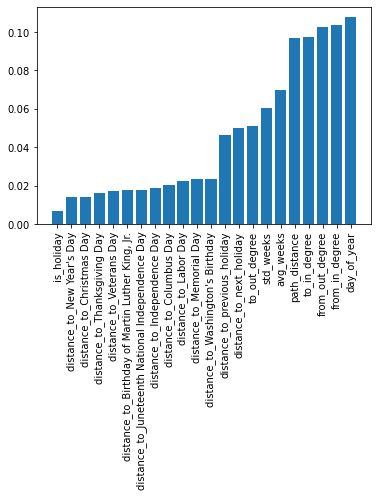

In [17]:
# run model with best params
exp.run(config={'model': best_params, **config}, use_cache=True)

In [20]:
exp.freeze("submission", flights_test, with_sub=True)

Successfully created the directory submission/random-forest
add_is_holiday  ...
add_distance_to_next_holiday  ...
add_distance_to_previous_holiday  ...
add_distance_to_holidays  ...
add_path_distance  ...
add_path_embedding  ...
add_day_of_year  ...
[10.32093801 12.15284492 10.74286957 11.69169592 10.91143289]
generate submission  submission/random-forest/submission.csv
